In [ ]:
# import dependencies
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False
plt.rc('font', size=18)
plt.rcParams['figure.figsize'] = [10, 7]

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors2 =  plt.cm.tab20( (np.arange(20)).astype(int) )
from numpy.polynomial import polynomial as poly
from scipy import signal, stats, integrate, linalg
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 
%cd /content/drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
model_str='fcc_model_64r'
weights=np.load('weights/dynamic_weights_'+model_str+'.npy')
pcomp=np.load('pc/pc_'+model_str+'.npy')[::-1]
model=tf.keras.models.load_model('saved_model/'+model_str)
layer_name=model.d2
layer_shape=layer_name.get_weights()[0].shape
values_mean=np.mean(weights,axis=0)
layer_size=1
for i in layer_name.get_weights()[0].shape:
    layer_size*=i

In [ ]:
U,s,Vh=linalg.svd(values_mean.reshape(layer_shape))

(array([8., 8., 6., 7., 8., 7., 7., 6., 3., 4.]),
 array([3.9574370e-06, 3.7760225e-01, 7.5520056e-01, 1.1327988e+00,
        1.5103972e+00, 1.8879955e+00, 2.2655938e+00, 2.6431921e+00,
        3.0207903e+00, 3.3983886e+00, 3.7759869e+00], dtype=float32),
 <a list of 10 Patch objects>)

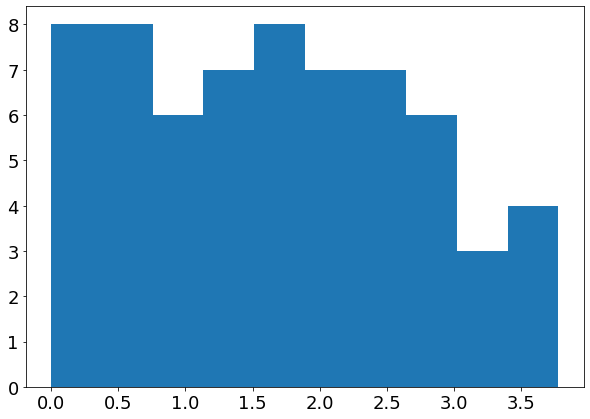

In [ ]:
plt.hist(s)

In [ ]:
#function to caluclate weight matrix of one specific singular value
def s_weights(i):
    sing=np.zeros((U.shape[0],Vh.shape[0]))
    sing[i,i]=s[i]
    w_tilde=np.ndarray.flatten(np.matmul(U, np.matmul(sing, Vh)))
    w_tilde/=np.linalg.norm(w_tilde)
    return w_tilde

In [ ]:
svv=np.zeros((s.shape[0],layer_size))
for i in tf.range(s.shape[0]):
    svv[i]=s_weights(i)

In [26]:
np.save('sv/sv_'+model_str,s)
np.save('sv/svv_'+model_str,svv)

In [ ]:
field=np.tensordot(pcomp,svv,axes=(1,1))

<function matplotlib.pyplot.show(*args, **kw)>

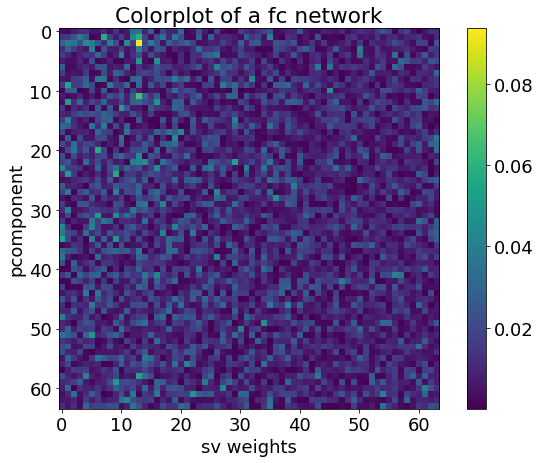

In [ ]:
plt.imshow(np.abs(field[:64]))
plt.colorbar()
plt.title("Colorplot of a fc network")
plt.ylabel('pcomponent')
plt.xlabel('sv weights')
#plt.savefig("plots/fc_color_expl.jpg")
plt.show